In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

terra = pd.read_csv('terraclimate_features_training.csv')
water = pd.read_csv('water_quality_training_dataset.csv')
landsat = pd.read_csv('landsat_features_training.csv')

merged = pd.merge(terra, water, on=['Latitude', 'Longitude', 'Sample Date'], how='inner')
merged = pd.merge(merged, landsat, on=['Latitude', 'Longitude', 'Sample Date'], how='inner')

features = [
    'pet', 'Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus',
    'nir', 'green', 'swir16', 'swir22', 'NDMI', 'MNDWI'
]

In [4]:
corr_matrix = merged[features].corr(method='pearson')

In [6]:
corr_matrix.to_csv('feature_correlations.csv', index=True)
print(" Correlation matrix saved as 'feature_correlations.csv'")

pet_swir22 = corr_matrix.loc['pet', 'swir22']
print(f"\nCorrelation coefficient between 'pet' and 'swir22': {pet_swir22:.4f}")

 Correlation matrix saved as 'feature_correlations.csv'

Correlation coefficient between 'pet' and 'swir22': 0.0508


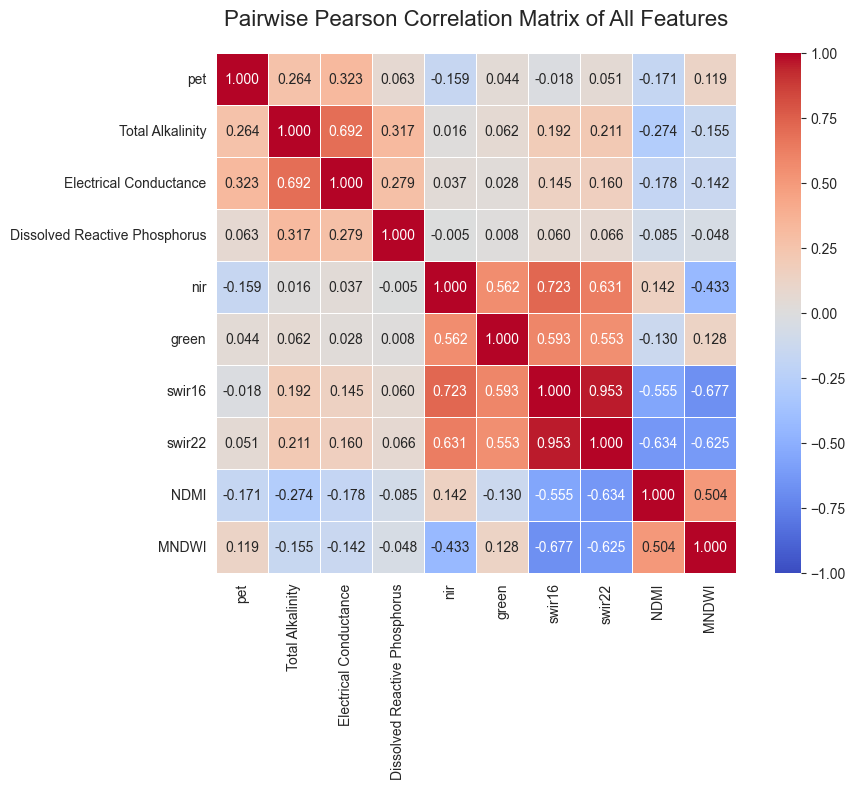

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            center=0, fmt='.3f', linewidths=0.5, square=True)
plt.title('Pairwise Pearson Correlation Matrix of All Features', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

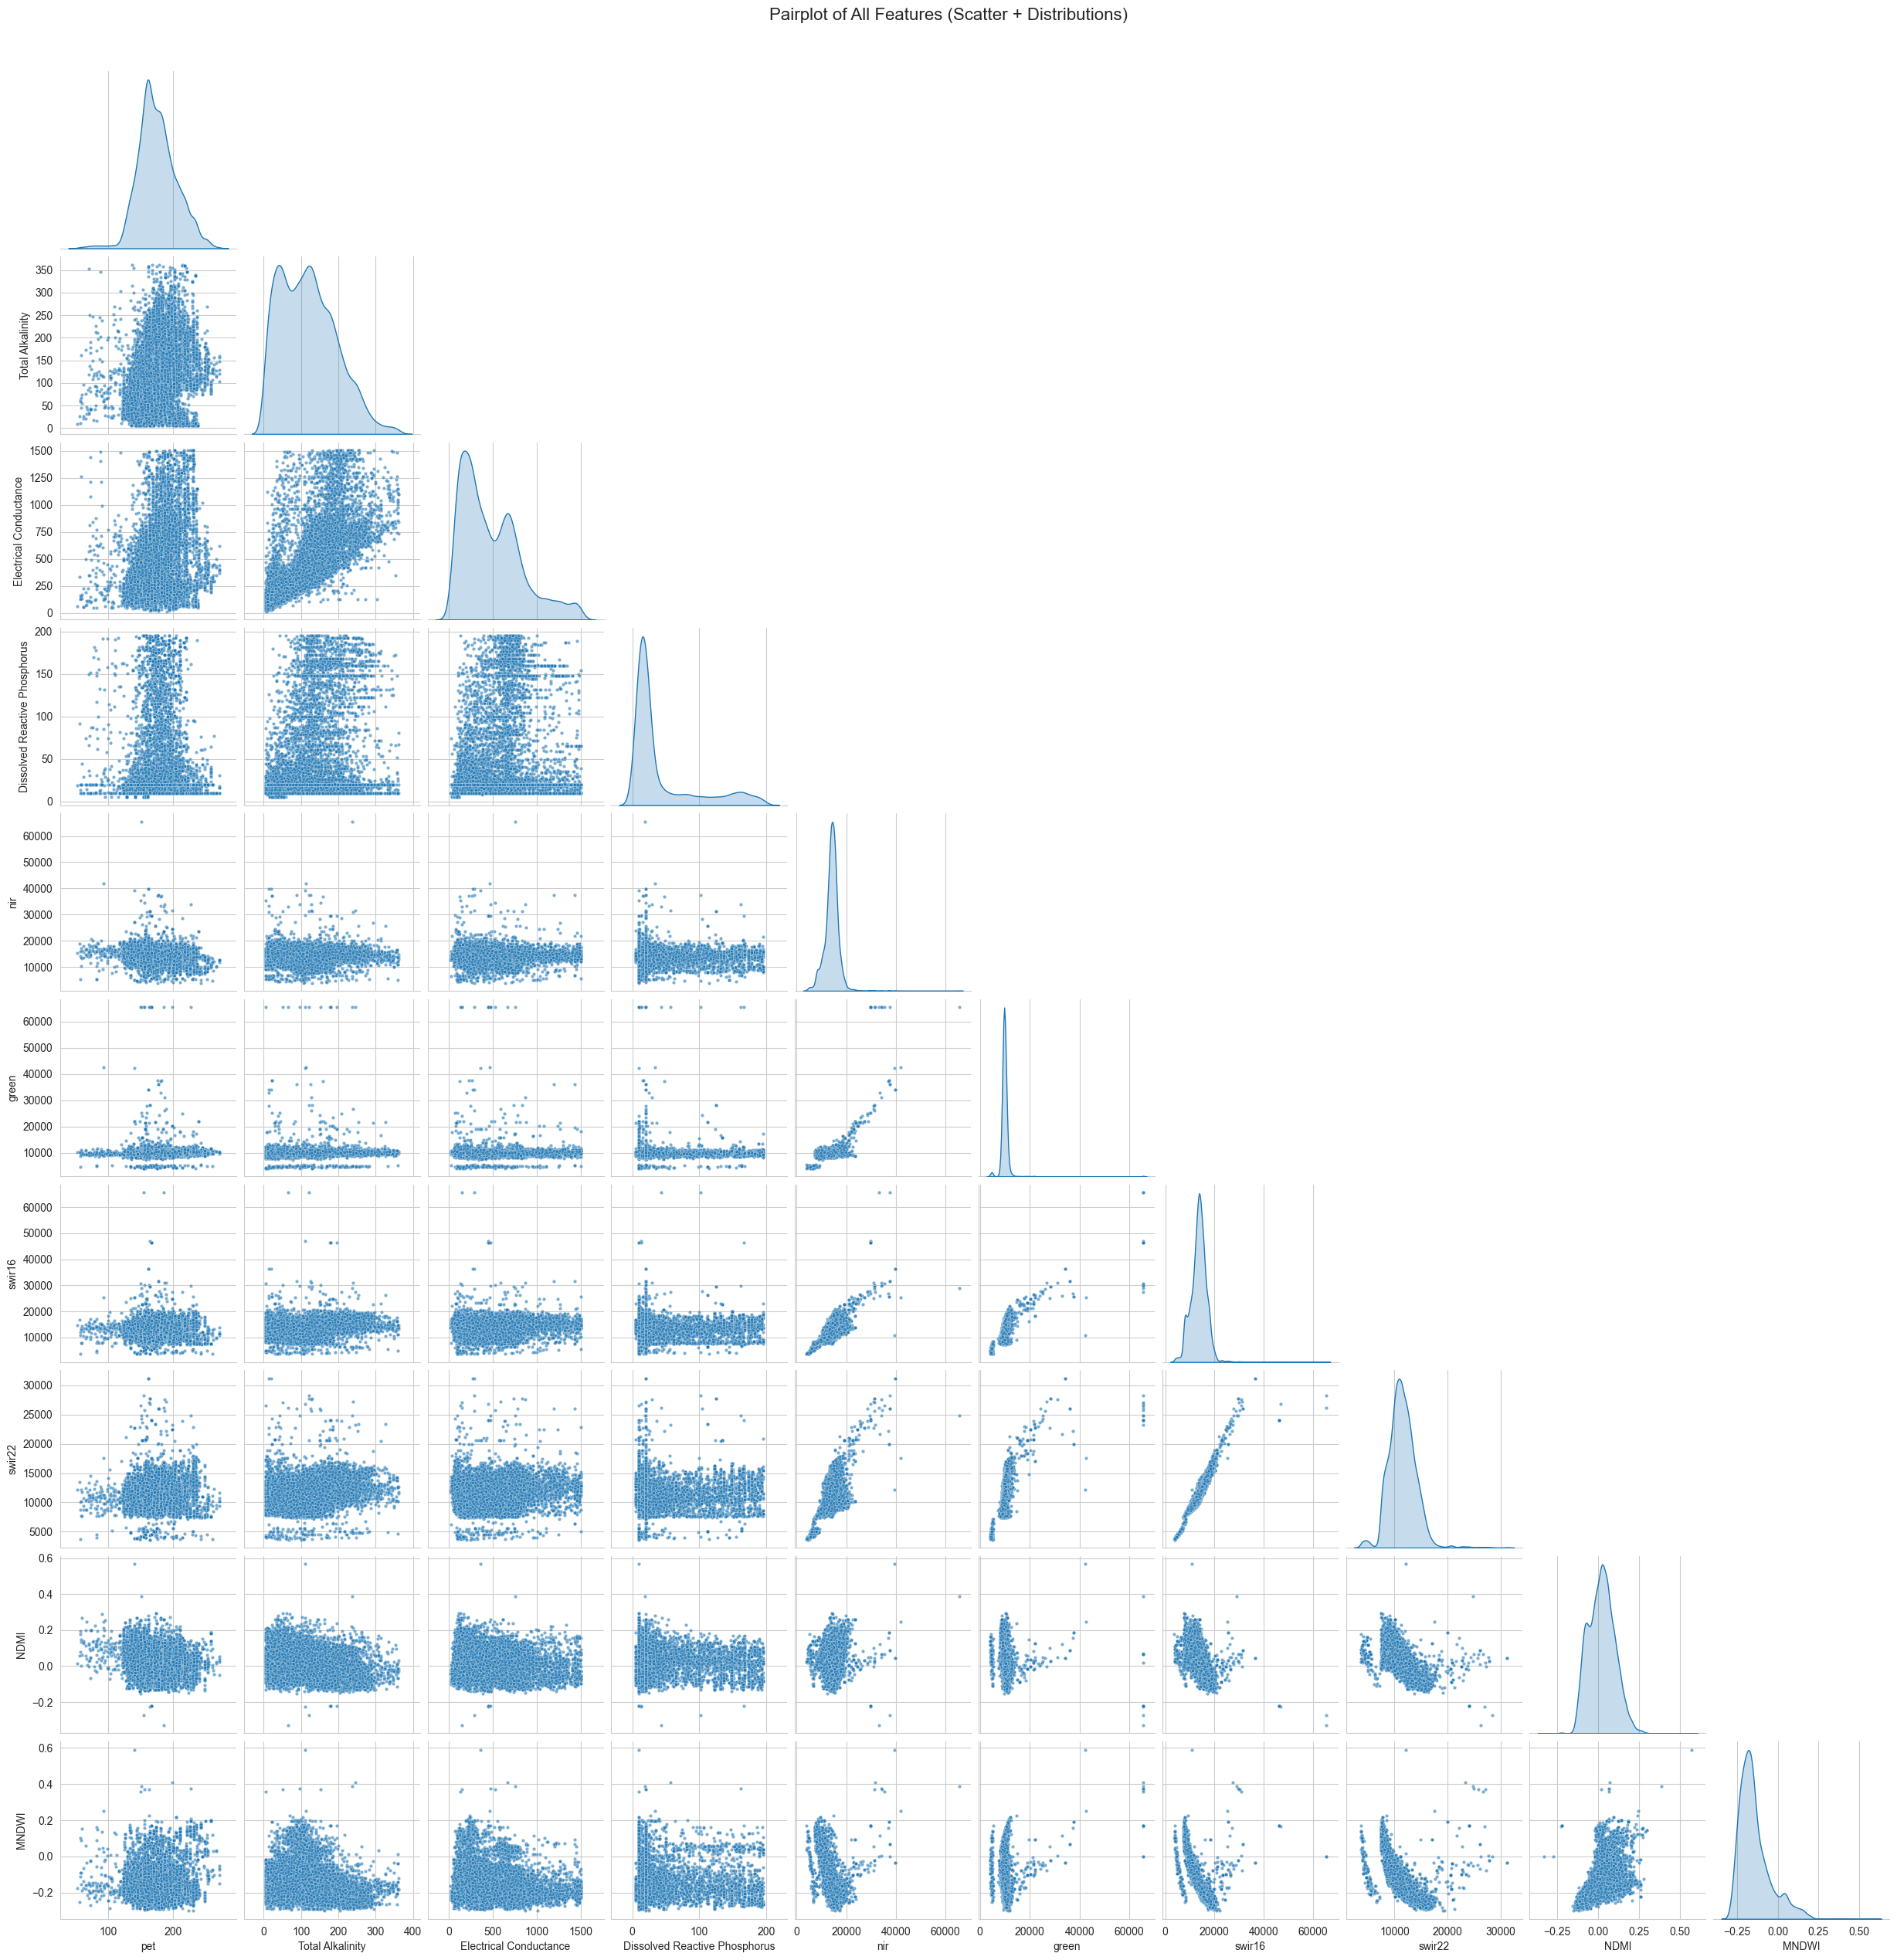

In [8]:
pairplot_fig = sns.pairplot(merged[features], 
                            diag_kind='kde', 
                            plot_kws={'alpha': 0.6, 's': 10},
                            corner=True)
pairplot_fig.fig.suptitle('Pairplot of All Features (Scatter + Distributions)', 
                          y=1.02, fontsize=16)
plt.savefig('pairplot_all_features.png', dpi=300, bbox_inches='tight')
plt.show()

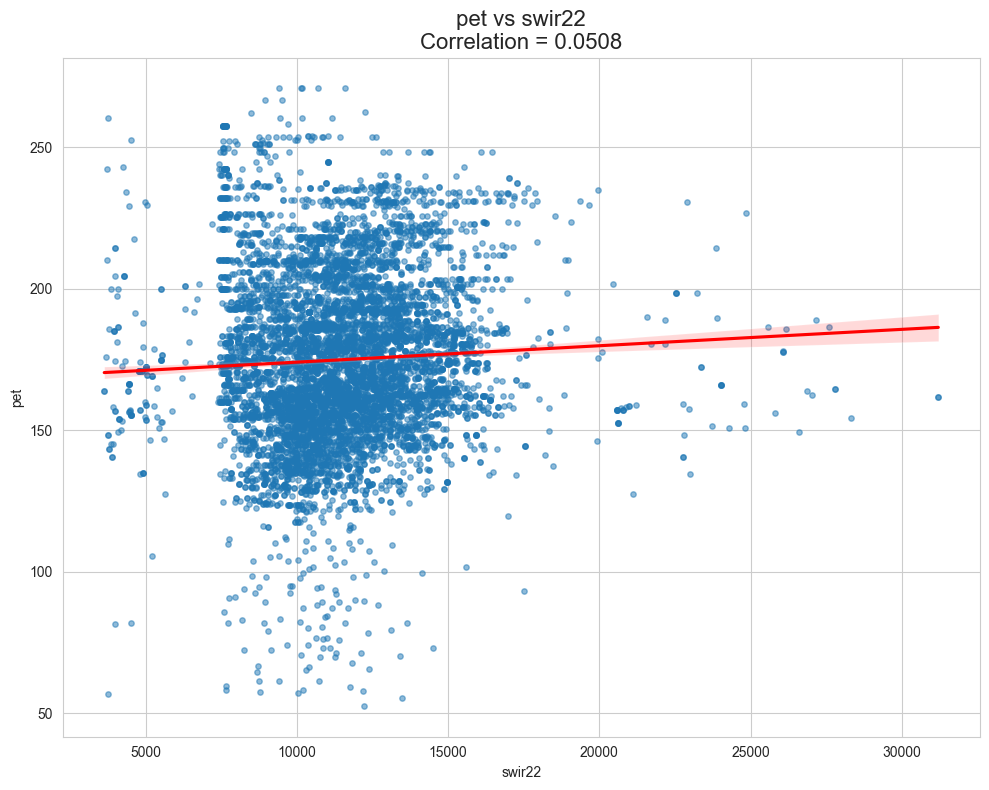

In [9]:
plt.figure(figsize=(10, 8))
sns.regplot(x='swir22', y='pet', data=merged, 
            scatter_kws={'alpha': 0.5, 's': 15}, 
            line_kws={'color': 'red'})
plt.title(f'pet vs swir22\nCorrelation = {pet_swir22:.4f}', fontsize=16)
plt.xlabel('swir22')
plt.ylabel('pet')
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_pet_vs_swir22.png', dpi=300, bbox_inches='tight')
plt.show()